# Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

## Data Import and first Inspection

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

housing = pd.read_csv('housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [2]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
housing.isnull().describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640,20640,20640,20640,20640,20640,20640,20640,20640,20640
unique,1,1,1,1,2,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,20640,20640,20640,20640,20433,20640,20640,20640,20640,20640


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


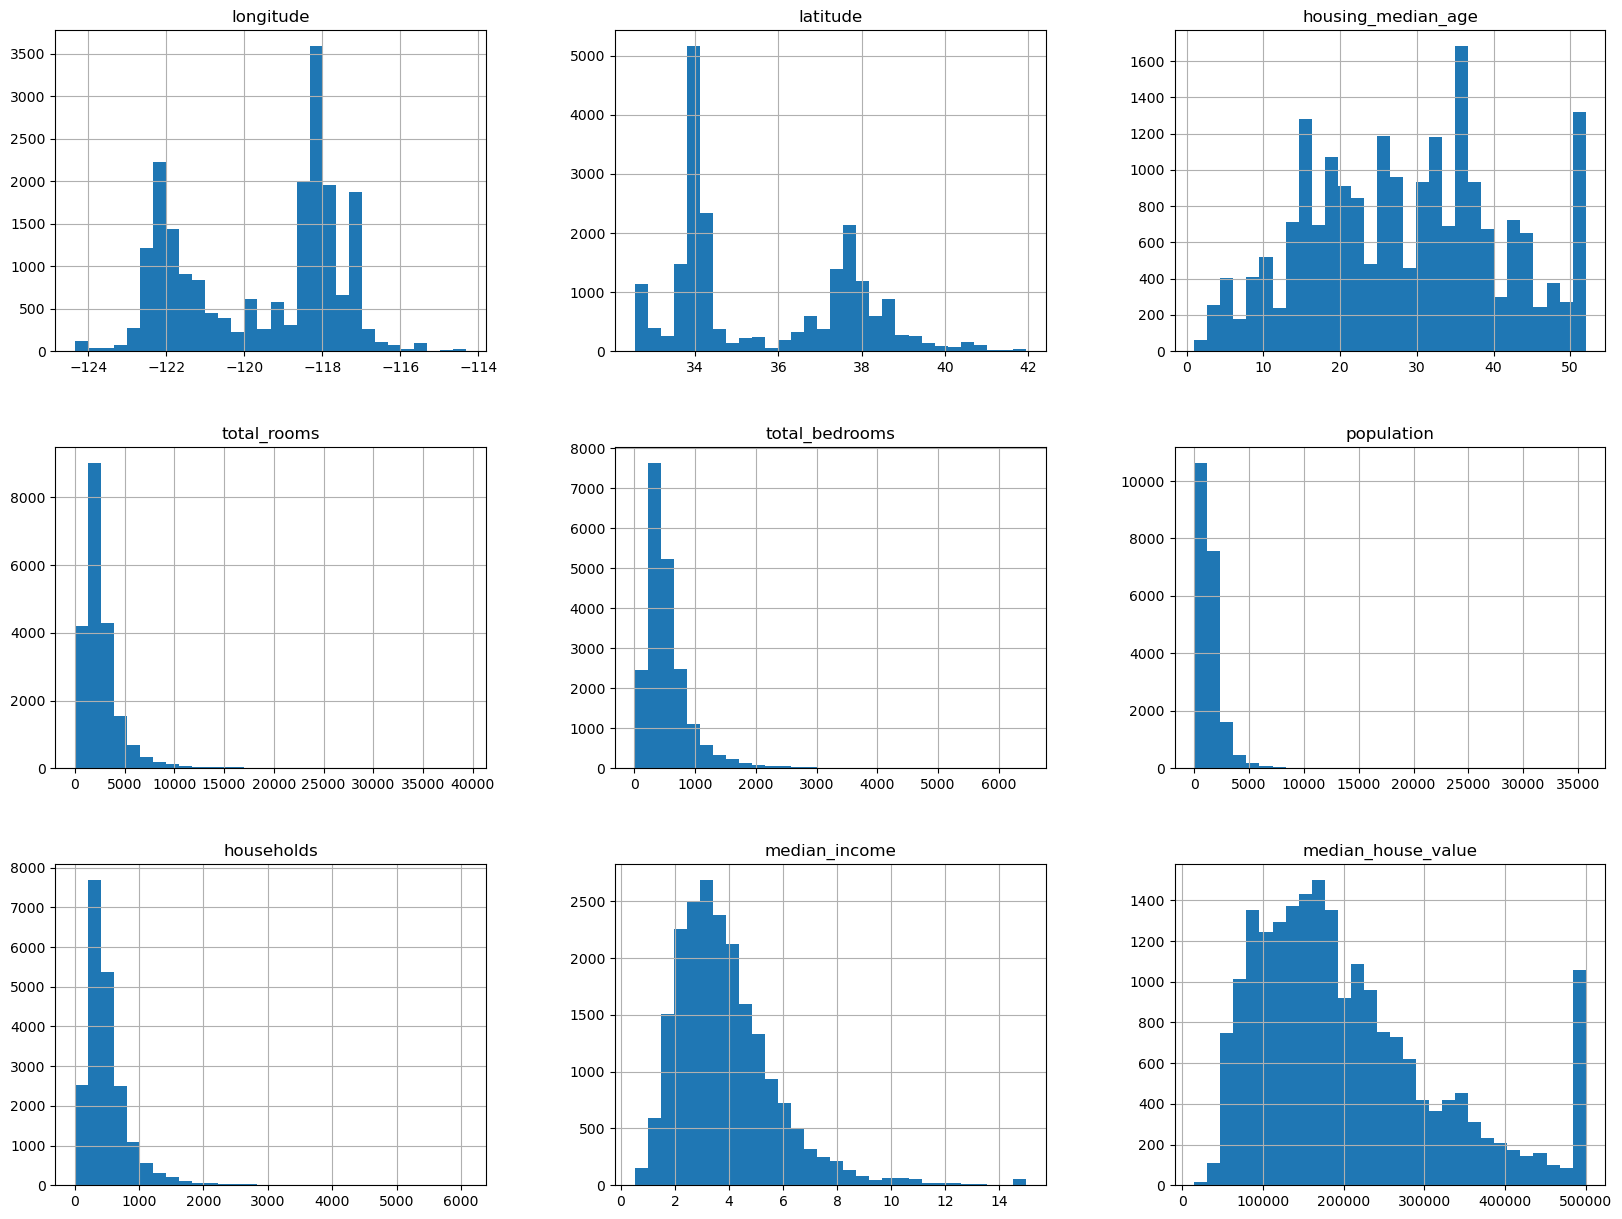

In [5]:
import matplotlib.pyplot as plt
housing.hist(figsize=[20, 15],bins=30)
plt.show()

## Data Cleaning and Creating additional Features

__Dropped all rows with at least one missing value(s).__

In [2]:
housing.iloc[:,4].value_counts(dropna=False).to_frame()

,count
total_bedrooms,
NaN,207
280.0,55
331.0,51
345.0,50
343.0,49
...,...
2961.0,1
1915.0,1
1215.0,1


In [3]:
housing.dropna(how='any', inplace=True)

 __Added the additional Feature ``rooms_per_household``.__

In [4]:
housing['rooms_per_household'] = housing.total_rooms.div(housing.households)
housing.rooms_per_household

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20433, dtype: float64

__Added the additional Feature ``population_per_household``.__ 

In [5]:
housing['population_per_household'] = housing.population.div(housing.households)
housing.population_per_household

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: population_per_household, Length: 20433, dtype: float64

__Added the additional Feature ``bedrooms_per_household``.__

In [6]:
housing['bedrooms_per_household'] = housing.total_bedrooms.div(housing.households)
housing.bedrooms_per_household

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Name: bedrooms_per_household, Length: 20433, dtype: float64

## Factors influencing House Prices ¿wich ones?

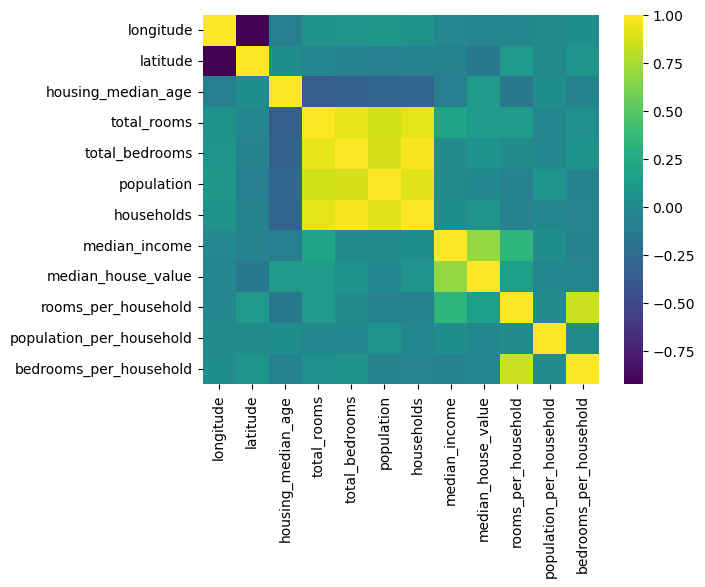

In [11]:
import seaborn as sns

sns.heatmap(housing.drop(columns='ocean_proximity').corr(), cmap='viridis')
plt.show()

__There is a strong positive correlation between median_income and median_house_value, indicating that income is a key determinant of home value. However, in coastal areas, this relationship may be less linear due to high real estate demand.__

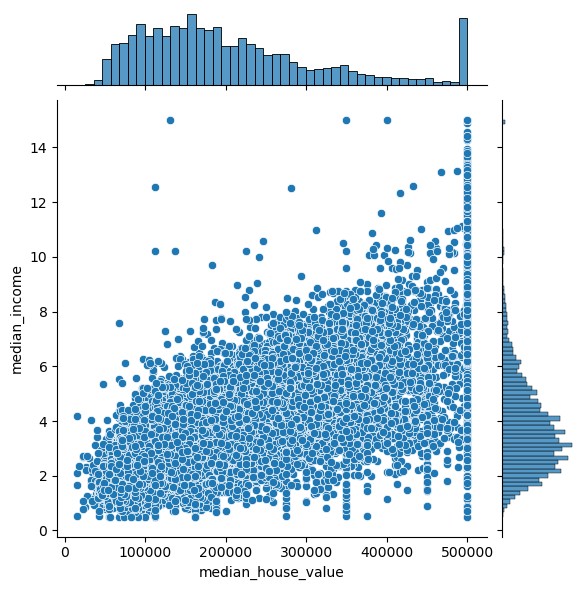

In [12]:
sns.jointplot(y=housing.median_income, x=housing.median_house_value)
plt.show()

__The distribution of median_house_value is concentrated in the lower and mid-range, with an artificial cap at__ ``$500,000``. __This suggests a possible data limitation, either due to recording policies or a market cap.__

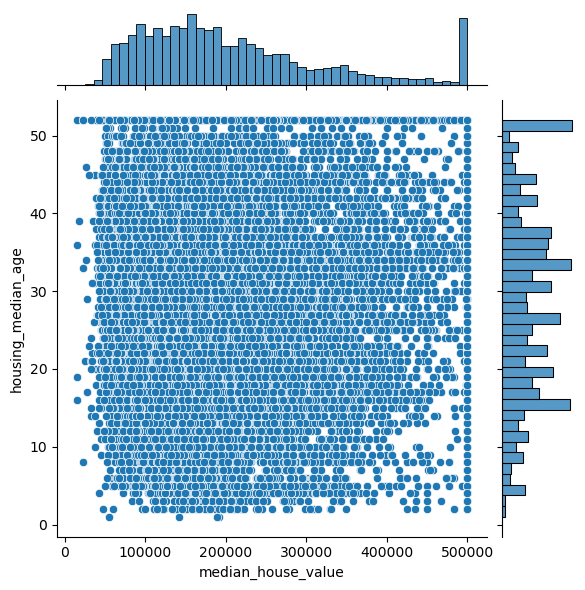

In [112]:
sns.jointplot(y=housing.housing_median_age, x=housing.median_house_value)
plt.show()

__There is no clear relationship between housing_median_age and median_house_value, suggesting that the age of a home is not a decisive factor in pricing, possibly due to renovations or maintenance efforts.__

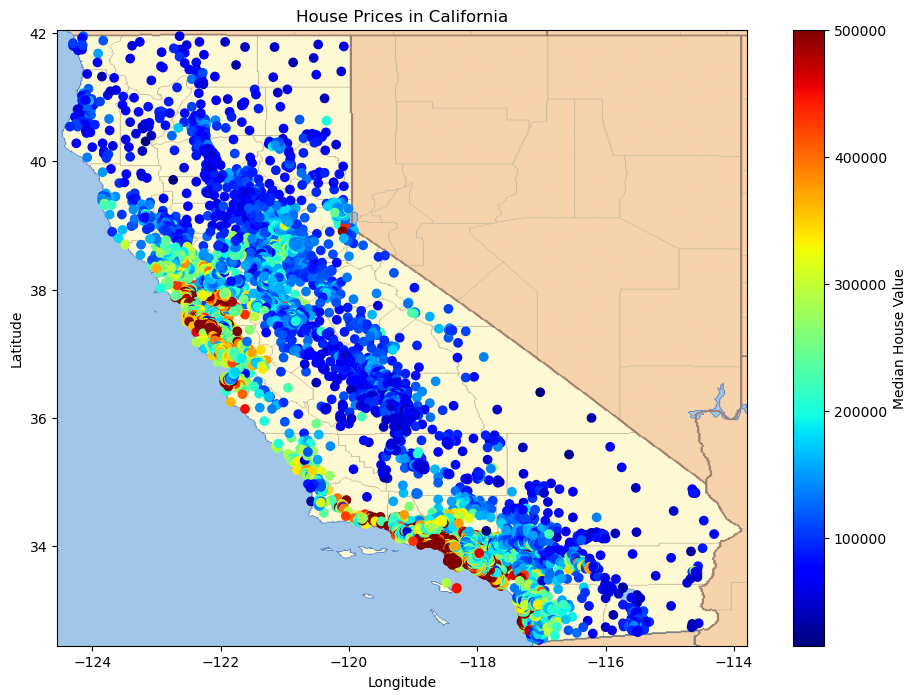

In [13]:
img = plt.imread('california.png') 
fig,ax = plt.subplots(figsize=(12,8))
img = ax.imshow(img, extent=[-124.55, -113.80, 32.45, 42.05])
scatter = ax.scatter(housing.longitude, housing.latitude, c=housing.median_house_value, cmap='jet')
cbar = fig.colorbar(scatter, ax=ax, label='Median House Value')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('House Prices in California')
plt.show()

__Homes near the coast have significantly higher prices, confirming that location is a crucial factor in property valuation. Clustering analysis reveals distinct groups of districts with similar characteristics, showing clear price distribution patterns based on region, likely influenced by urban development and access to amenities.__

## Advanced Explanatory Data Analyis 

__Added an additional column "income_cat" with the following income categories:__
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [7]:
housing['income_cat'] = pd.qcut(housing.median_income,q=[0,0.25,0.5,0.75,0.95,1], labels=['low', 'below_normal', 'above_average', 'high', 'very_high'])
housing['income_cat']

0            very_high
1            very_high
2                 high
3                 high
4        above_average
             ...      
20635              low
20636              low
20637              low
20638              low
20639              low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['low' < 'below_normal' < 'above_average' < 'high' < 'very_high']

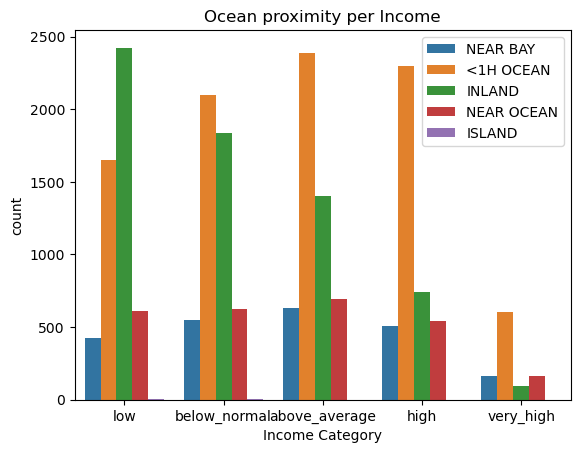

In [15]:
sns.countplot(housing,x='income_cat',hue='ocean_proximity')
plt.xlabel('Income Category')
plt.legend(title = '')
plt.title('Ocean proximity per Income')
plt.show()

__**INLAND** homes are more common in low-income areas, while those near the ocean (**<1H OCEAN**) are predominant in high-income areas. **NEAR BAY** and **NEAR OCEAN** maintain a stable presence, while **ISLAND** homes are very rare. This suggests that proximity to the ocean is associated with higher income levels.__

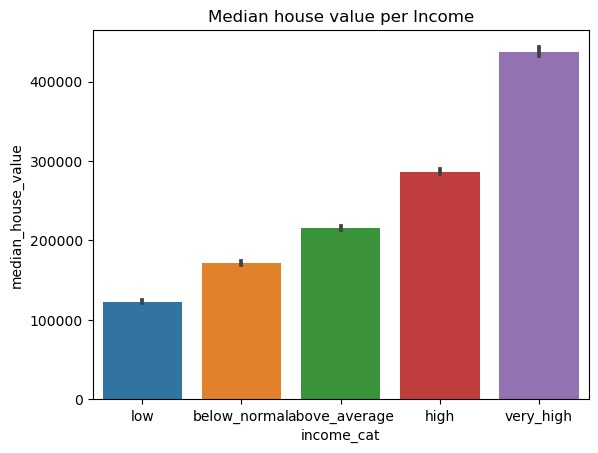

In [16]:
sns.barplot(housing, x='income_cat', y='median_house_value')
plt.title('Median house value per Income')
plt.show()

__The median home value increases as the income category rises. Homes in the **very high** income category have the highest value, exceeding **400,000**, while those in the **low** income category have the lowest value, around **120,000**. This indicates a strong positive relationship between income and home value.__

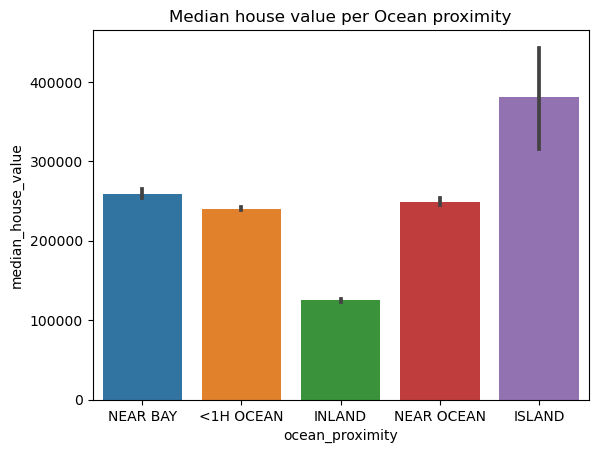

In [17]:
sns.barplot(housing, x='ocean_proximity', y='median_house_value')
plt.title('Median house value per Ocean proximity')
plt.show()

__Heatmap with mean house values for all combinations of income_cat & ocean_proximity:__

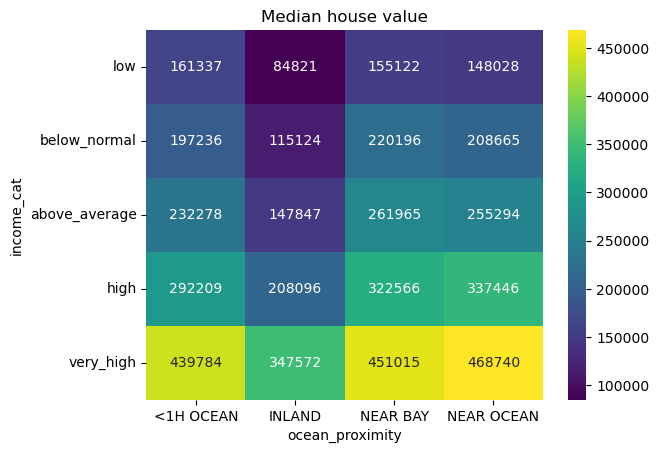

In [18]:
heatmap = housing.pivot_table(index='income_cat', columns='ocean_proximity', values='median_house_value').drop(columns='ISLAND')

sns.heatmap(heatmap, annot=True, fmt='.0f', cmap='viridis')
plt.title('Median house value')
plt.show()

## Machine Learning - Predicting House Values

### Feature Engineering 

In [8]:
y = housing.median_house_value.copy()

In [9]:
features = housing.drop(columns='median_house_value')
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_household       20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_household    20433 non-null  float64 
 12  income_cat                20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage

__Standardization of all the features.__

In [21]:
import scipy.stats as stats
pd.options.display.float_format = '{:.2f}'.format

feat1 = features.select_dtypes('float').copy().apply(lambda x: stats.zscore(x))
feat1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.39,-1.45,-2.19,-1.21,-1.27,-1.25,-1.30,-1.78,-1.85,-0.23,-1.60
25%,-1.11,-0.80,-0.84,-0.54,-0.57,-0.56,-0.57,-0.69,-0.40,-0.06,-0.19
50%,0.54,-0.64,0.03,-0.23,-0.24,-0.23,-0.24,-0.18,-0.08,-0.02,-0.10
75%,0.78,0.98,0.66,0.23,0.26,0.26,0.27,0.46,0.25,0.02,0.01
max,2.63,2.96,1.86,16.79,14.02,30.23,14.60,5.86,54.97,118.82,69.25


In [22]:
feat1.agg(['mean', 'std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


__Getting dummies for categorical faeature ``ocean_proximity``.__

In [23]:
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [24]:
features1 = pd.concat([feat1, dummies], axis=1)
features1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-0.15,False,False,False,True,False
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.26,False,False,False,True,False
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-0.05,False,False,False,True,False
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.05,False,False,False,True,False
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.03,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.08,False,True,False,False,False
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.46,False,True,False,False,False
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.05,False,True,False,False,False
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.16,False,True,False,False,False


In [25]:
features1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   total_rooms               20433 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20433 non-null  float64
 6   households                20433 non-null  float64
 7   median_income             20433 non-null  float64
 8   rooms_per_household       20433 non-null  float64
 9   population_per_household  20433 non-null  float64
 10  bedrooms_per_household    20433 non-null  float64
 11  <1H OCEAN                 20433 non-null  bool   
 12  INLAND                    20433 non-null  bool   
 13  ISLAND                    20433 non-null  bool   
 14  NEAR BAY   

__Training the ML Model (Random Forest Regressor)__

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features1, y, test_size=.2, random_state=14)

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=500,
                                   max_features= "sqrt", max_depth= 75, min_samples_split=2,
                                     criterion='squared_error', min_samples_leaf=1, random_state=14)

rf_regressor.fit(X_train, y_train)
rf_regressor.score(X_train, y_train)

0.9761106268128358

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

preds = rf_regressor.predict(X_train)

mae = mean_absolute_error(preds, y_train)
mse = mean_squared_error(y_train, preds)

print(f'MAE = {mae}')
print(f'MSE = {mse}')

MAE = 11806.819962682002
MSE = 317646039.9129225


__Evaluating the model on the Test Set.__

In [29]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=14)

In [30]:
rf_regressor.score(X_test, y_test)

0.8237925591250317

In [31]:
import numpy as np
preds = rf_regressor.predict(X_test)

mae = mean_absolute_error(preds, y_test)
mse = mean_squared_error(y_test, preds)

print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'RMSE = {np.sqrt(mse)}')

MAE = 32523.132807438218
MSE = 2367601374.654721
RMSE = 48658.00421980664


__Feature Importance__


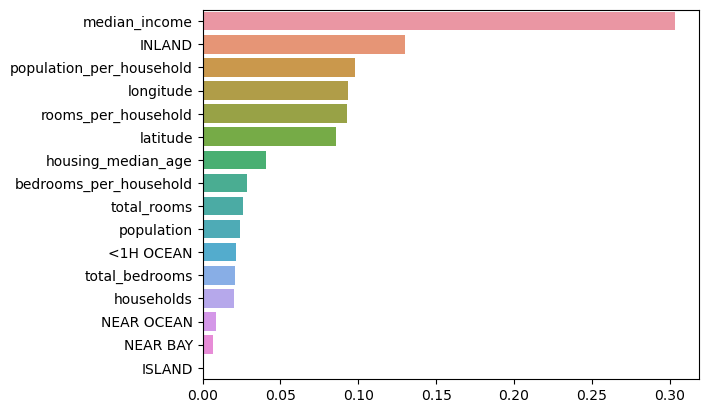

In [32]:
importance = pd.Series(rf_regressor.feature_importances_, index=features1.columns).sort_values(ascending=False)

sns.barplot(x=importance, y=importance.index)
plt.show()

__Managing Overfitting and Tuning the hyper-parameters.__

In [33]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('rfR',RandomForestRegressor(criterion='absolute_error', max_features= "log2", random_state=14))])
parameters = {'rfR__n_estimators':(300, 350, 400, 450, 500),'rfR__max_depth':(10, 15, 20),
              'rfR__min_samples_split':(2, 3, 4, 5),'rfR__min_samples_leaf':(1,2, 3, 4, 5) }

grid_search = HalvingGridSearchCV(pipeline,parameters,n_jobs=-1,
                                  cv=5, verbose=1, scoring='neg_mean_absolute_error', aggressive_elimination=True)

grid_search.fit(X_train,y_train)

print('Best Training score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    
preds = grid_search.predict(X_test)
print ("Testing mse:",round(mean_squared_error(y_test,preds),4))
print ("Testing mae:",round(mean_absolute_error(preds, y_test),4))

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 67
max_resources_: 16346
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 300
n_resources: 67
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
----------
iter: 1
n_candidates: 100
n_resources: 67
Fitting 5 folds for each of 100 candidates, totalling 500 fits
----------
iter: 2
n_candidates: 34
n_resources: 201
Fitting 5 folds for each of 34 candidates, totalling 170 fits
----------
iter: 3
n_candidates: 12
n_resources: 603
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 4
n_resources: 1809
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 5427
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Training score: -36756.272
Best parameters set:
	rfR__max_depth: 20
	rfR__min_samples_leaf: 2
	rfR__min_samples_split: 5
	rfR__n_estimators: 500
Testing mse: 243

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.8185391694772401

In [35]:
vs = pd.DataFrame({'Actual':y_test, 'Predicted':preds})

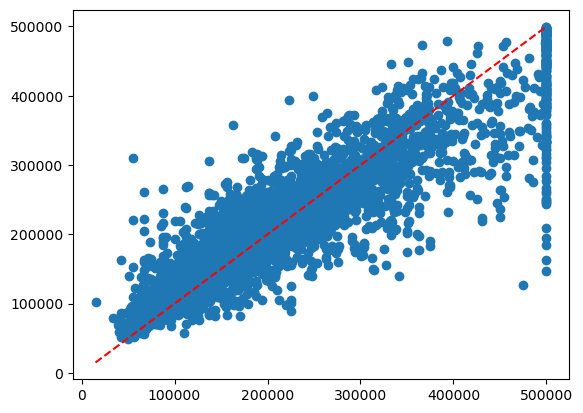

In [36]:
plt.scatter(vs.Actual, vs.Predicted)
plt.plot([min(vs.Actual), max(vs.Actual)], [min(vs.Actual), max(vs.Actual)], color='red', linestyle='--')
plt.title('Real vs Prediction Values')
plt.show()

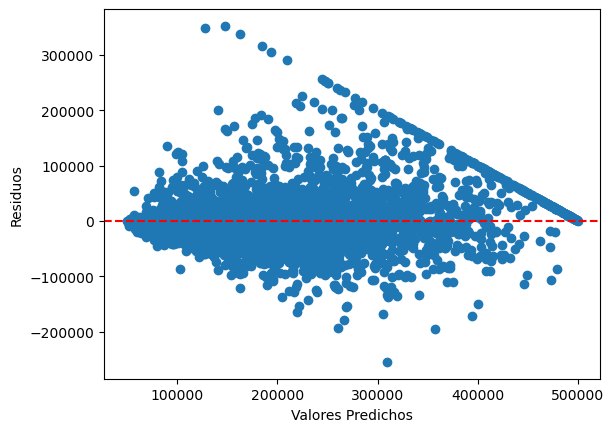

In [37]:
plt.scatter(vs.Predicted, vs.Actual - vs.Predicted)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title('Grafico de Residuos')
plt.show()

## Best RF Regression Model

__Trying yeo-johnson Tranformation for skewed features and the objective variable.__

In [78]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

feat2 = features.select_dtypes('float')

feat2[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
        ] = pt.fit_transform(features[['total_rooms', 'total_bedrooms', 'population', 
                                       'households', 'median_income']])

feat2 = features.select_dtypes('float').copy()

In [79]:
features2 = pd.concat([feat2, dummies], axis=1)
                        
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features2, y, test_size=.2, random_state=14)          


In [80]:
pt_y = PowerTransformer(method='yeo-johnson')
y_train= pt_y.fit_transform(y_train.values.reshape(-1,1))
  
y_train = pd.Series(y_train[:,0])

In [81]:
grid_search.fit(X_train,y_train)

print('Best Training score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    
preds = grid_search.predict(X_test)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 67
max_resources_: 16346
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 300
n_resources: 67
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
----------
iter: 1
n_candidates: 100
n_resources: 67
Fitting 5 folds for each of 100 candidates, totalling 500 fits
----------
iter: 2
n_candidates: 34
n_resources: 201
Fitting 5 folds for each of 34 candidates, totalling 170 fits
----------
iter: 3
n_candidates: 12
n_resources: 603
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 4
n_resources: 1809
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 5427
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Training score: -0.061
Best parameters set:
	rfR__max_depth: 20
	rfR__min_samples_leaf: 1
	rfR__min_samples_split: 3
	rfR__n_estimators: 450


In [82]:
# Invertir la transformación
preds = pt_y.inverse_transform(preds.reshape(-1,1))


print ("Testing mse:",round(mean_squared_error(y_test,preds),4))
print ("Testing mae:",round(mean_absolute_error(preds, y_test),4))

Testing mse: 122588425.6745
Testing mae: 4968.5191


In [83]:
r2_score(y_test, preds)

0.9908764232863531

In [111]:
vs = pd.DataFrame({'Actual':y_test, 'Predicted':preds.flatten()})

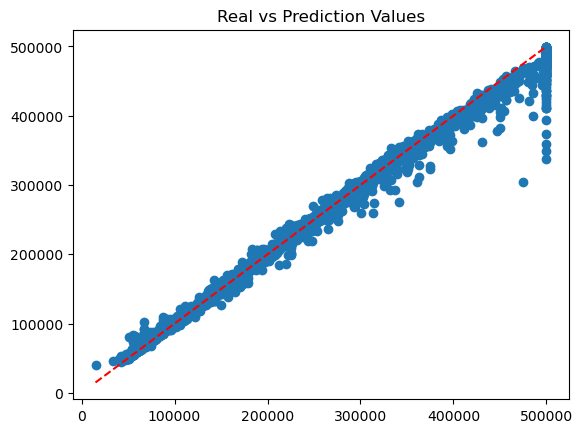

In [109]:
plt.scatter(vs.Actual, vs.Predicted)
plt.plot([min(vs.Actual), max(vs.Actual)], [min(vs.Actual), max(vs.Actual)], color='red', linestyle='--')
plt.title('Real vs Prediction Values')
plt.show()

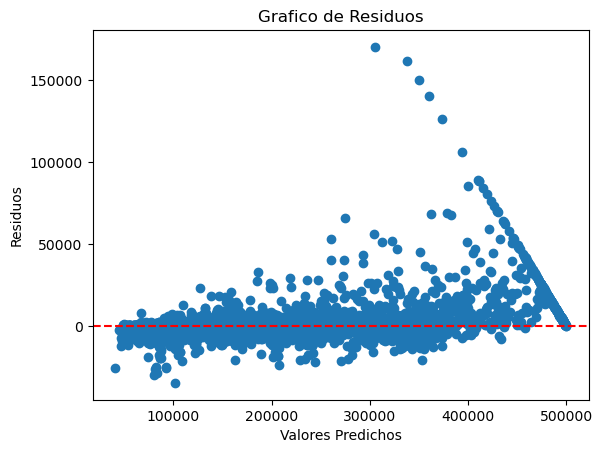

In [110]:
plt.scatter(vs.Predicted, vs.Actual - vs.Predicted)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title('Grafico de Residuos')
plt.show()